# Solving the Time-Space separability Schrödinger Equation for a Harmonic Oscillator Potential

The time-dependent Schrödinger equation (TDSE) describes the time evolution of a quantum mechanical system in a given potential energy function. In one-dimensional systems, the TDSE is given by:

$$i \hbar \frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x,t)}{\partial x^2} + V(x) \psi(x,t)$$

where $\hbar$ is the reduced Planck constant, $m$ is the mass of the particle, $V(x)$ is the potential energy function, and $\psi(x,t)$ is the wavefunction. 

For a harmonic oscillator potential energy function, $V(x) = \frac{1}{2} kx^2$, the TDSE becomes:

$$i \hbar \frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x,t)}{\partial x^2} + \frac{1}{2} kx^2 \psi(x,t)$$

This Python code uses the `sympy` library to solve this TDSE for a harmonic oscillator potential energy function. The solution is obtained by assuming a separable solution $\psi(x,t) = \phi(x) \chi(t)$, which reduces the TDSE to the time-independent Schrödinger equation (TISE):

$$-\frac{\hbar^2}{2m} \frac{\partial^2 \phi(x)}{\partial x^2} + \left(\frac{1}{2} kx^2 - E\right) \phi(x) = 0$$

where $E$ is the total energy of the system, which is a constant. The time-dependent part is solved separately by assuming an exponential solution of the form:
$$\chi(t) = e^{-iEt/\hbar}$$.

The solution for the TISE is obtained by adding the potential energy term for the harmonic oscillator and solving for the space-dependent part. The space-dependent part can be solved by substituting $\phi(x) = A e^{-\alpha x^2}$, where $A$ and $\alpha$ are constants. 

Finally, the general solution is obtained by combining the space and time solutions:

$$\psi(x,t) = A e^{-\alpha x^2} e^{-iEt/\hbar}$$

This code demonstrates the power of `sympy` for symbolic manipulations and its usefulness for solving complex mathematical problems in quantum mechanics. 

In [138]:
# Enable interactive plot
%matplotlib notebook

In [139]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Definitions

In [125]:
# Define symbols
hbar, m, k, x, t, E = sp.symbols('hbar m k x t E', real=True, positive=True)
psi = sp.Function('psi')(x, t)

# Define the time-dependent Schrödinger equation (TDSE)
TDSE = sp.Eq(sp.I * hbar * psi.diff(t), (-hbar**2 / (2 * m)) * psi.diff(x, 2))
print('TDSE:')
display(TDSE)

TDSE:


Eq(I*hbar*Derivative(psi(x, t), t), -hbar**2*Derivative(psi(x, t), (x, 2))/(2*m))

## Assume time-space separability
$$\psi(x, t) = \phi(x)\chi(t)$$

In [126]:
# Obtain the time-independent Schrödinger equation (TISE) as a special case
# By assuming a separable solution: psi(x, t) = phi(x) * chi(t)
phi = sp.Function('phi')(x)
chi = sp.Function('chi')(t)
psi_separable = phi * chi
TISE_separable = TDSE.subs(psi, psi_separable).doit()
display(TISE_separable)

Eq(I*hbar*phi(x)*Derivative(chi(t), t), -hbar**2*chi(t)*Derivative(phi(x), (x, 2))/(2*m))

## Time Part

In [127]:
# Divide by psi_separable to simplify the equation
TISE_separable = (TISE_separable.lhs / psi_separable).simplify()


# The resulting equation is a product of functions of x and t, so each part must be constant
# Define the constant
constant = sp.Symbol('C')

# Set the time-dependent part equal to the constant
time_eq = sp.Eq(chi.diff(t) / chi, -sp.I * constant * hbar)
print("Time equation")
display(time_eq)

# Solve the time-dependent part
time_solution = sp.dsolve(time_eq, chi)
print("Time solution:")
display(time_solution)

Time equation


Eq(Derivative(chi(t), t)/chi(t), -I*C*hbar)

Time solution:


Eq(chi(t), C1*exp(-I*C*hbar*t))

## Space Part

In [129]:
# Set the space-dependent part equal to the constant
space_eq = sp.Eq((-hbar**2 / (2 * m)) * phi.diff(x, 2) - constant * hbar**2 * phi, 0)
print("Space equation:")
display(space_eq)

# Define the potential energy function for the harmonic oscillator
V = (1/2) * k * x**2

# Add the potential energy term to the space-dependent part of the TISE
space_eq = space_eq.subs(constant * hbar**2 * phi, E * phi - V * phi)
display(space_eq)

# Solve the space-dependent TISE for the harmonic oscillator
space_solution = sp.dsolve(space_eq, phi)
print("Space solution:")
display(space_solution)

Space equation:


Eq(-C*hbar**2*phi(x) - hbar**2*Derivative(phi(x), (x, 2))/(2*m), 0)

Eq(-E*phi(x) - hbar**2*Derivative(phi(x), (x, 2))/(2*m) + 0.5*k*x**2*phi(x), 0)

Space solution:


Eq(phi(x), -E*m*x**5*r(3)/(10*hbar**2) + C2*(E**2*m**2*x**4/(6*hbar**4) - E*m*x**2/hbar**2 + 1 + k*m*x**4/(12*hbar**2)) + C1*x*(1 + k*m*x**4/(20*hbar**2)) + O(x**6))

## General Solution

In [117]:
# Combine the time and space solutions to obtain the general solution
general_solution = sp.Eq(psi, psi_separable.subs({phi: space_solution.rhs, chi: time_solution.rhs}))
print("General solution:")
display(general_solution)

General solution:


Eq(psi(x, t), C1*(-E*m*x**5*r(3)/(10*hbar**2) + C2*(E**2*m**2*x**4/(6*hbar**4) - E*m*x**2/hbar**2 + 1 + k*m*x**4/(12*hbar**2)) + C1*x*(1 + k*m*x**4/(20*hbar**2)) + O(x**6))*exp(-I*C*hbar*t))

## Representation

In [130]:
# Define specific values for the parameters and integration constants
params = {
    hbar: 1,  # Reduced Planck constant (in atomic units)
    m: 1,     # Mass of the particle (in atomic units)
    k: 1,     # Spring constant of the harmonic oscillator
    E: 1,     # Energy eigenvalue
    sp.Symbol('C'): 1,         # Constant separating the time and space parts
    sp.Symbol('C1'): 1,        # Integration constant 1
    sp.Symbol('C2'): 0,        # Integration constant 2
    sp.Function('r')(3): 0,    # Coefficient of the asymptotic series (set to 0 for simplicity)
}

# Assumme perturbations x << 1 -> O(x^6) = 0
general_solution = sp.Eq(general_solution.lhs, general_solution.rhs.expand().removeO())

# Substitute the specific values into the general solution
specific_solution = general_solution.subs(params)
display(specific_solution)

Eq(psi(x, t), x**5*exp(-I*t)/20 + x*exp(-I*t))

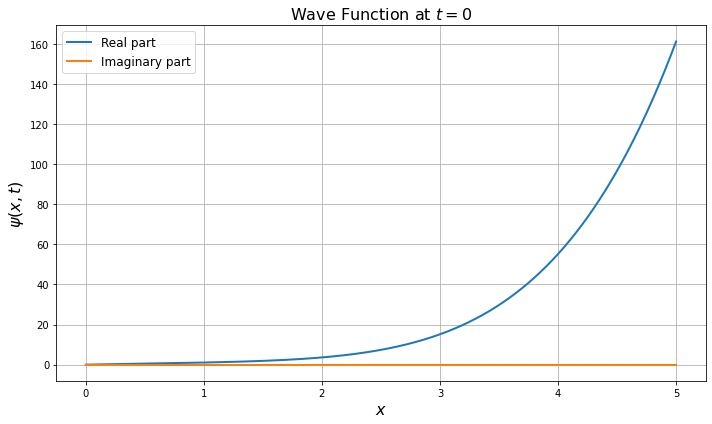

In [135]:
# Lambdify the wave function to create a function for plotting
psi_func = sp.lambdify((x, t), specific_solution.rhs, 'numpy')

# Define the spatial and temporal range for the plot
x_vals = np.linspace(0, 5, 1000)
t_val = 0  # Choose a specific time (e.g., t=0) for a 2D plot

# Calculate the wave function values
psi_vals = psi_func(x_vals, t_val)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, np.real(psi_vals), label='Real part', lw=2)
plt.plot(x_vals, np.imag(psi_vals), label='Imaginary part', lw=2)

# Add labels and legend
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$\psi(x, t)$', fontsize=16)
plt.title('Wave Function at $t={}$'.format(t_val), fontsize=16)
plt.legend(fontsize=12)

# Set the plot style
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

<IPython.core.display.Javascript object>


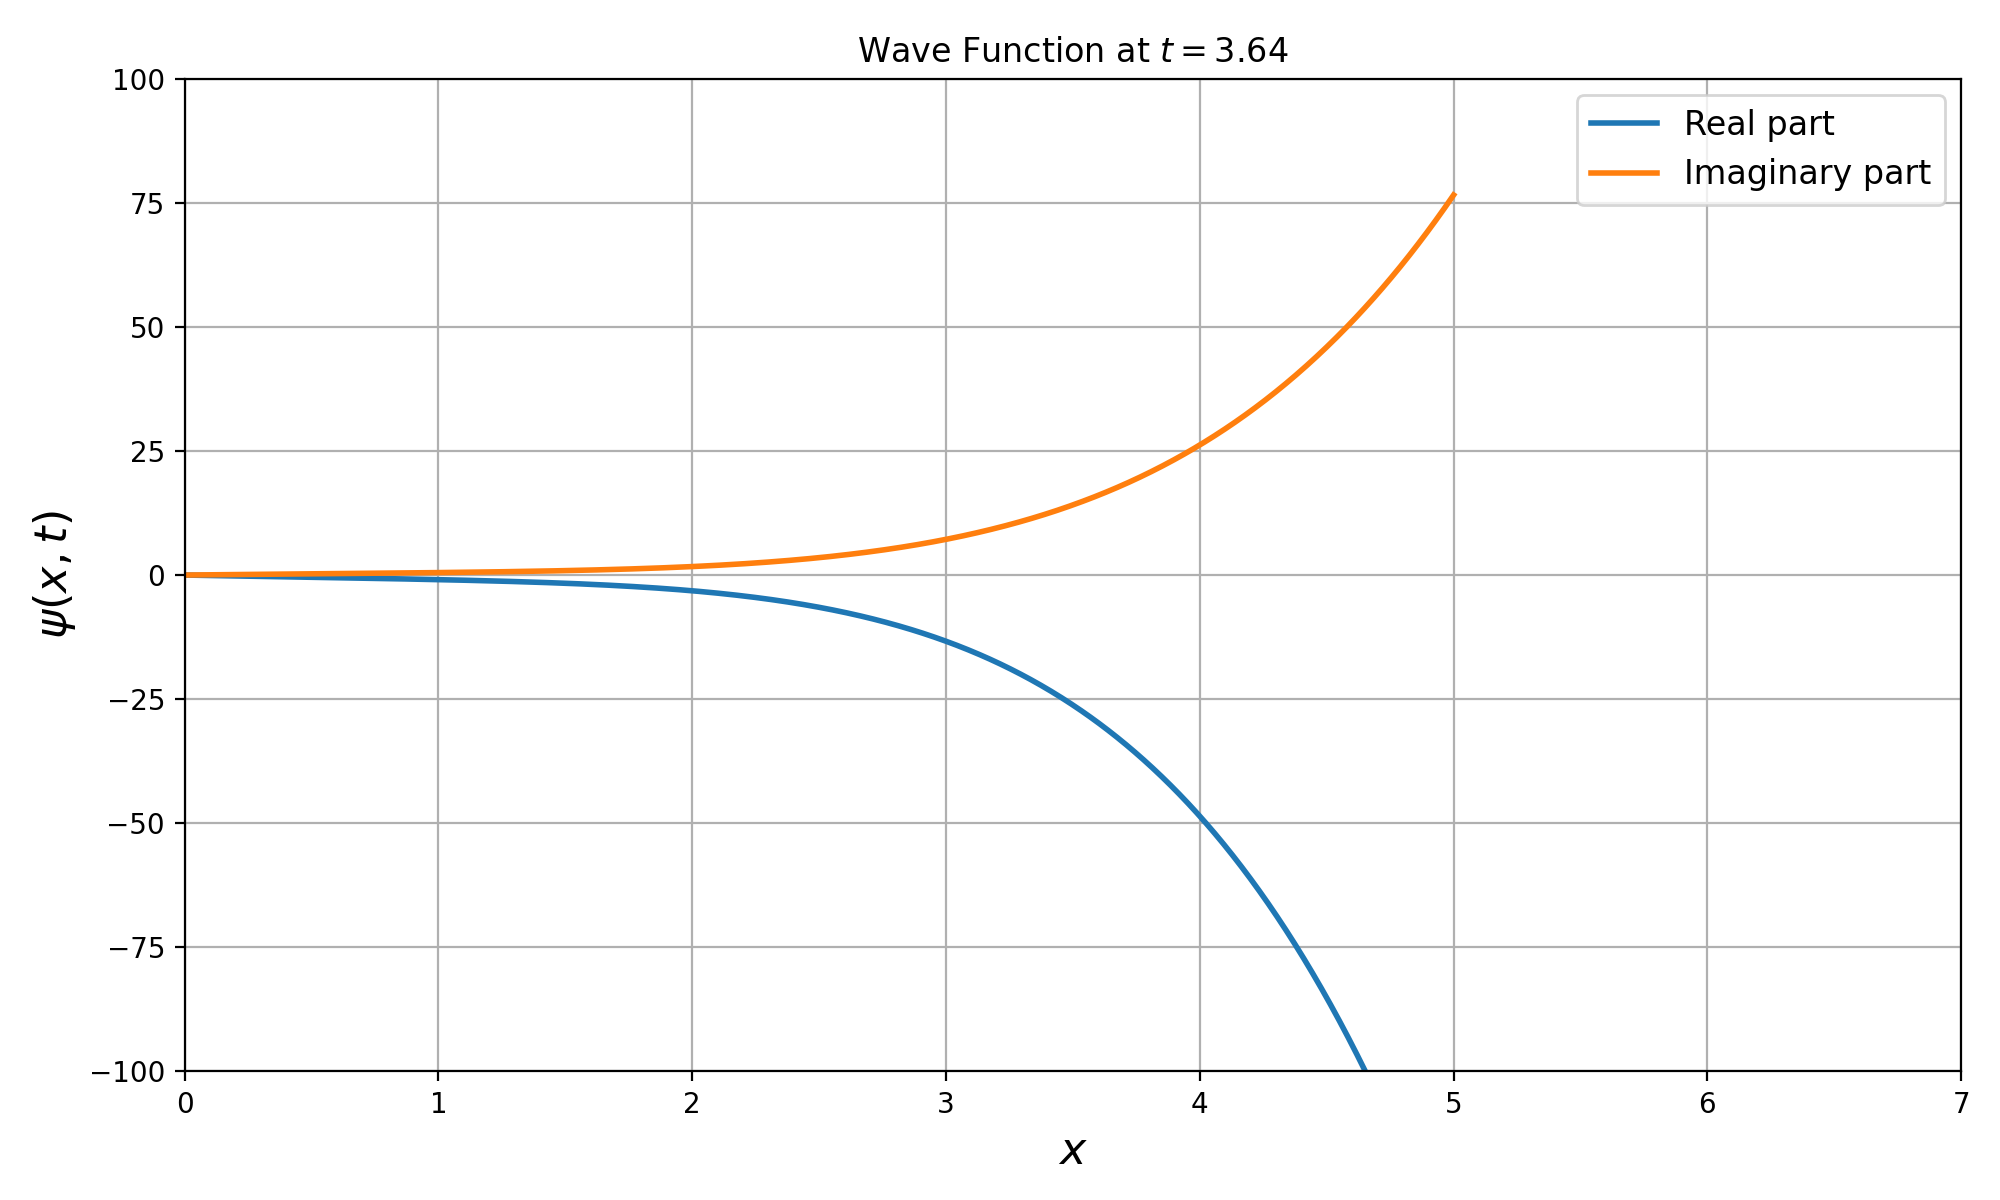

In [143]:
# Define the spatial and temporal range for the plot
x_vals = np.linspace(0, 5, 1000)
t_vals = np.linspace(0, 10, 100)  # Define a temporal range for the animation

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
real_line, = ax.plot(x_vals, np.real(psi_func(x_vals, 0)), label='Real part', lw=2)
imag_line, = ax.plot(x_vals, np.imag(psi_func(x_vals, 0)), label='Imaginary part', lw=2)

# Add labels and legend
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$\psi(x, t)$', fontsize=16)
ax.set_title('Wave Function', fontsize=16)
ax.legend(fontsize=12)

# Limits
ax.set_xlim(0, 7)
ax.set_ylim(-100, 100)

# Set the plot style
ax.grid(True)
plt.tight_layout()

# Animation update function
def update(t_val):
    psi_vals = psi_func(x_vals, t_val)
    real_line.set_ydata(np.real(psi_vals))
    imag_line.set_ydata(np.imag(psi_vals))
    ax.set_title('Wave Function at $t={:.2f}$'.format(t_val))

# Create the animation
ani = FuncAnimation(fig, update, frames=t_vals, interval=100, blit=False)

# Display the animation
plt.show()